In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'size':16})
rc('lines', **{'linewidth':3.0})
rc('savefig', **{'facecolor':'white'})
rc('axes', **{'labelsize':16})
rc('xtick', **{'direction':'in', 'top':True, 'minor.visible':True})
rc('ytick', **{'direction':'in', 'right':True, 'minor.visible':True})

# load magic numbers from file
octdates = [27,29,31]
novdates = [2,4,6,8]
dates = octdates + [novdates[i] + 31 for i in range(len(novdates))]
dates = np.array(dates)
# on october 4, mag detected as 17.074
# on october 13, mag detected as 15.25
startdate = 13
days = dates - startdate # days after discovery
print(days)

[14 16 18 20 22 24 26]


In [2]:
# manually load known data points from a spreadsheet
vmags = np.array([16.322, 16.045, 16.022, 16.276, 16.483,16.693, 17.152])
vsnr = np.array([118.7, 171, 92.6, 118.2, 98.6, 134.3, 90.9])
verr = 2.5/(vsnr*np.log(10))
bmags = np.array([15.669, 15.44, 15.707])
bsnr = np.array([57.9, 102.2, 72.7])
berr = 2.5/(bsnr*np.log(10))

# errors as calculated through S/N formula, with sigma = 2.5/ln(10) * N/S
verr = [0.04755,0.0476,0.0476,0.0476,0.0476,0.04761,0.04760]
berr = [0.0475, 0.0476, 0.0475]

Text(0.5, 1.0, 'UBI Lightcurve')

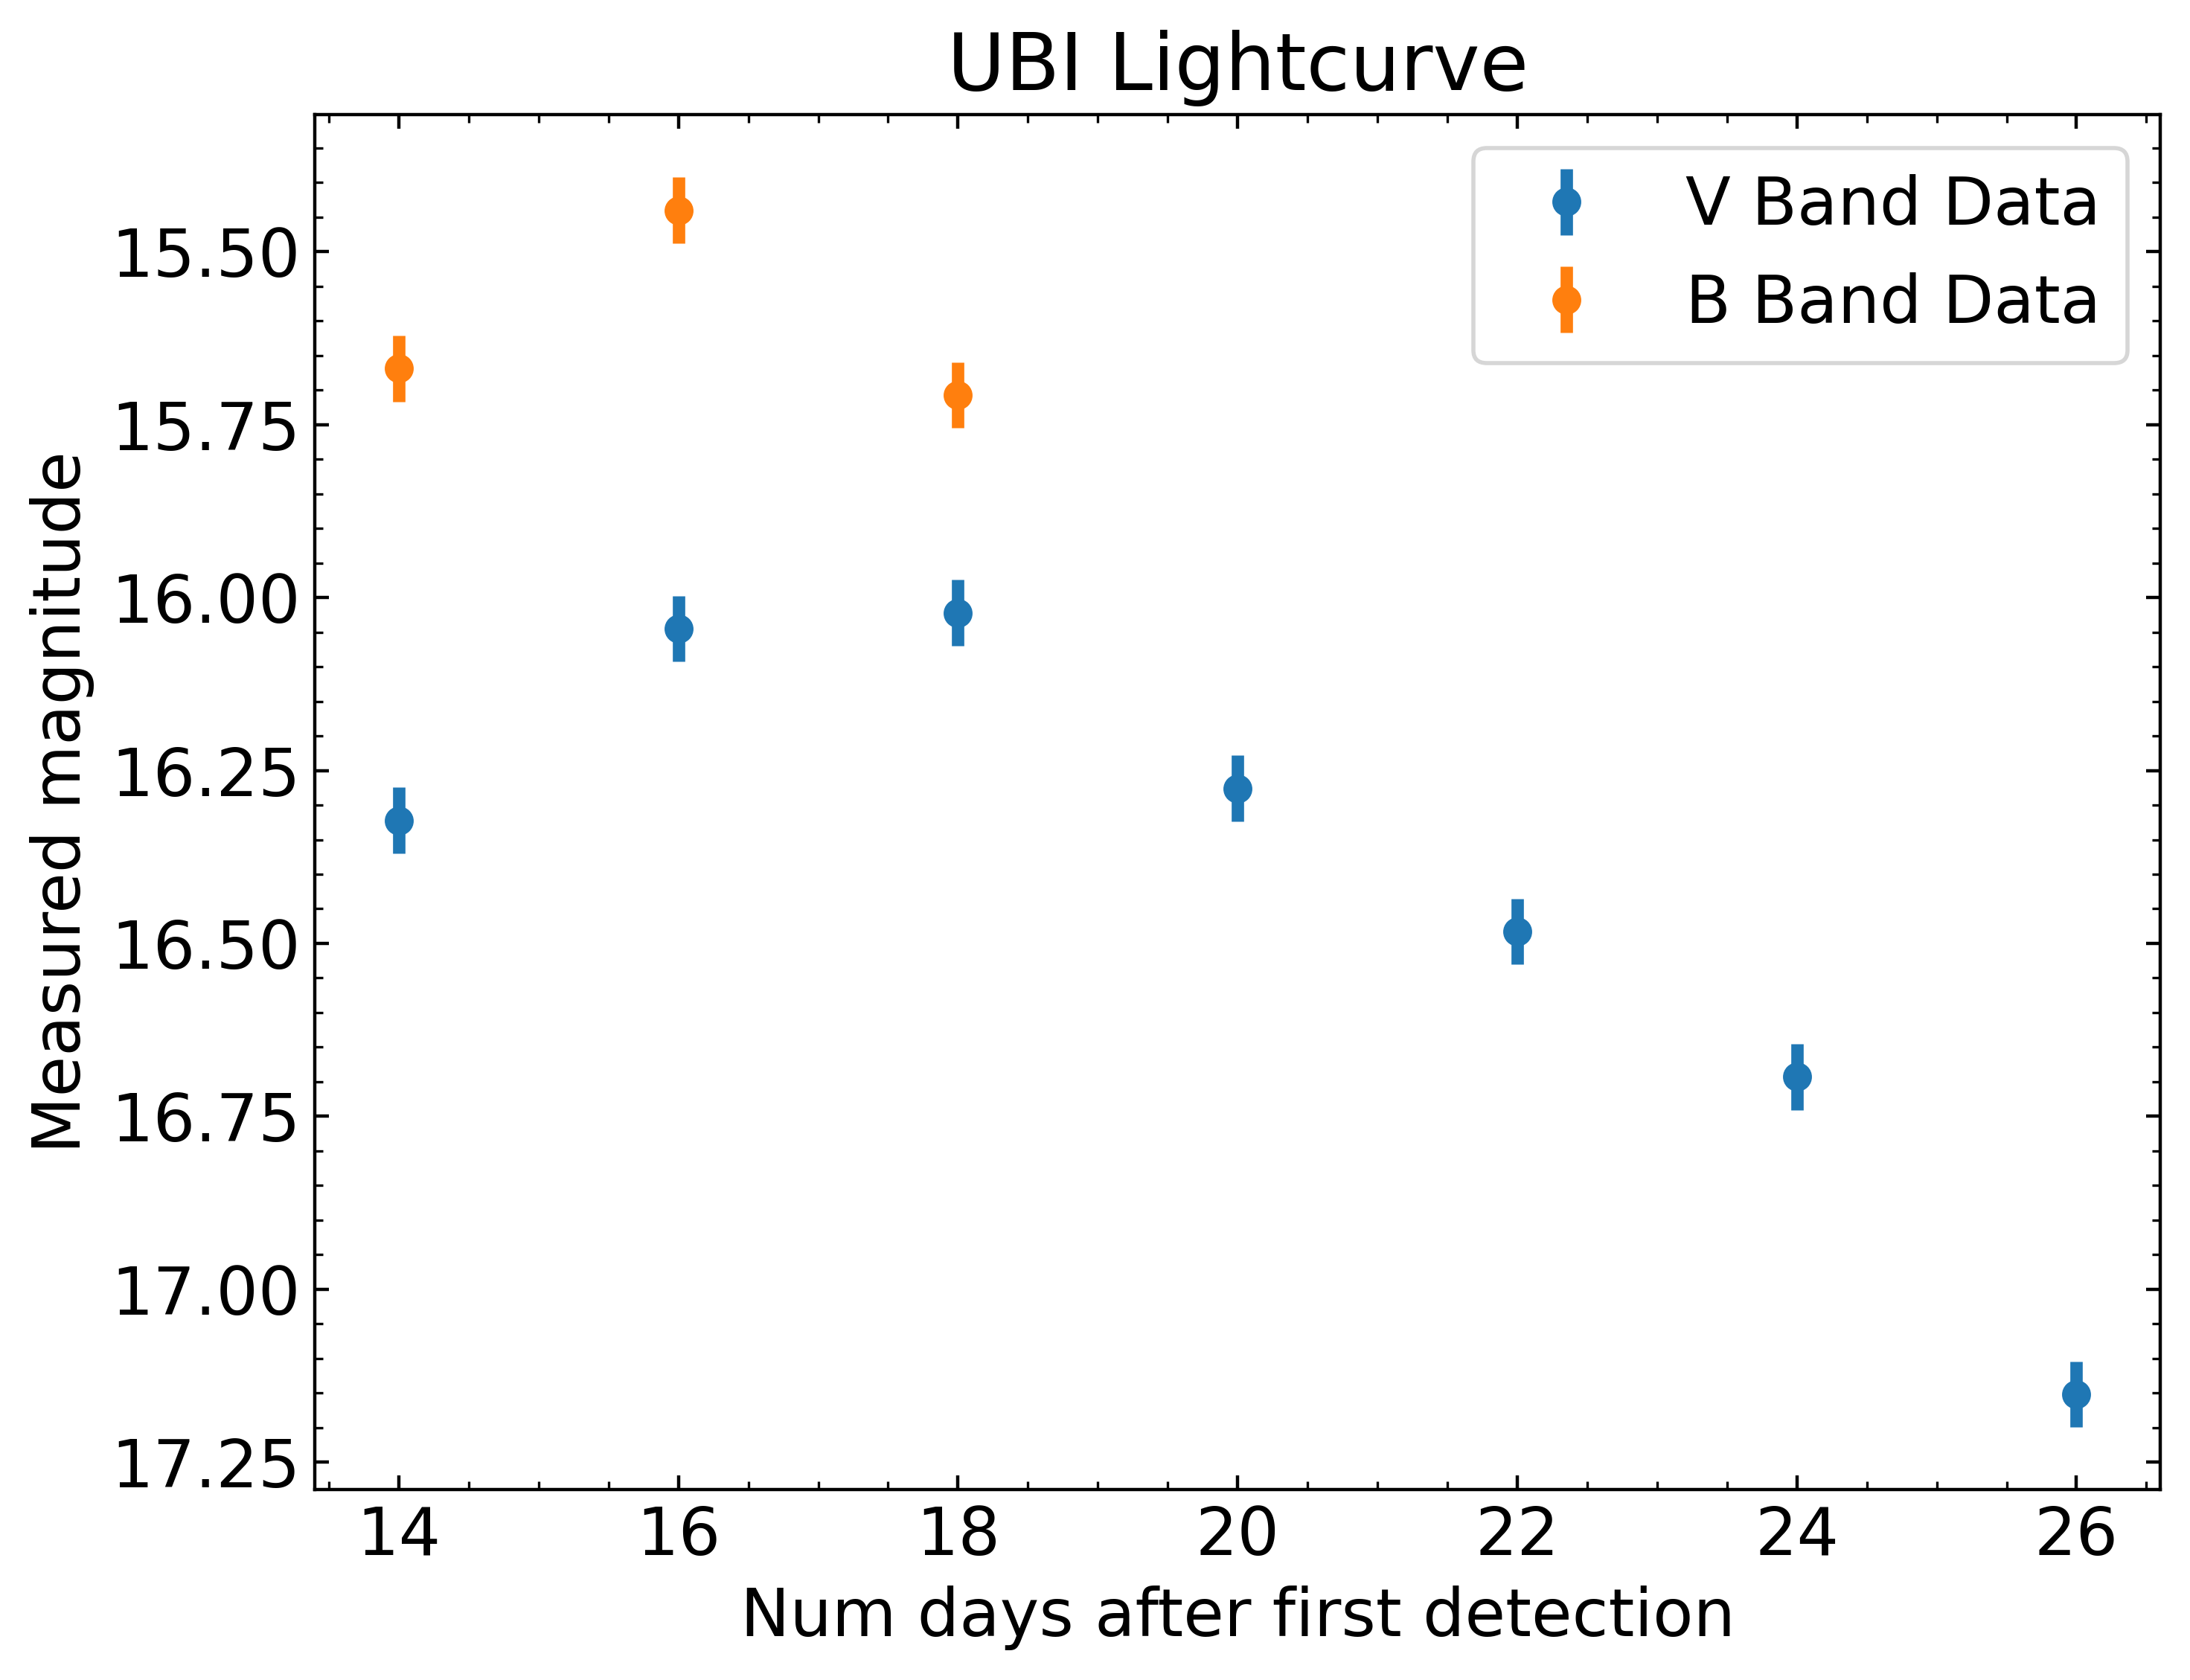

In [23]:
plt.figure(figsize=(8,6),dpi=400)
plt.errorbar(days, vmags, yerr=verr,linestyle='',marker='o',label="V Band Data")
plt.errorbar(days[0:3],bmags,yerr=berr,linestyle='',marker='o',label="B Band Data")
plt.legend()
plt.gca().invert_yaxis()
plt.xlabel("Num days after first detection")
plt.ylabel("Measured magnitude")
plt.title("UBI Lightcurve")

chisq = 0.00011534934019165475 df = 5


Text(0.5, 1.0, 'UBI Lightcurve')

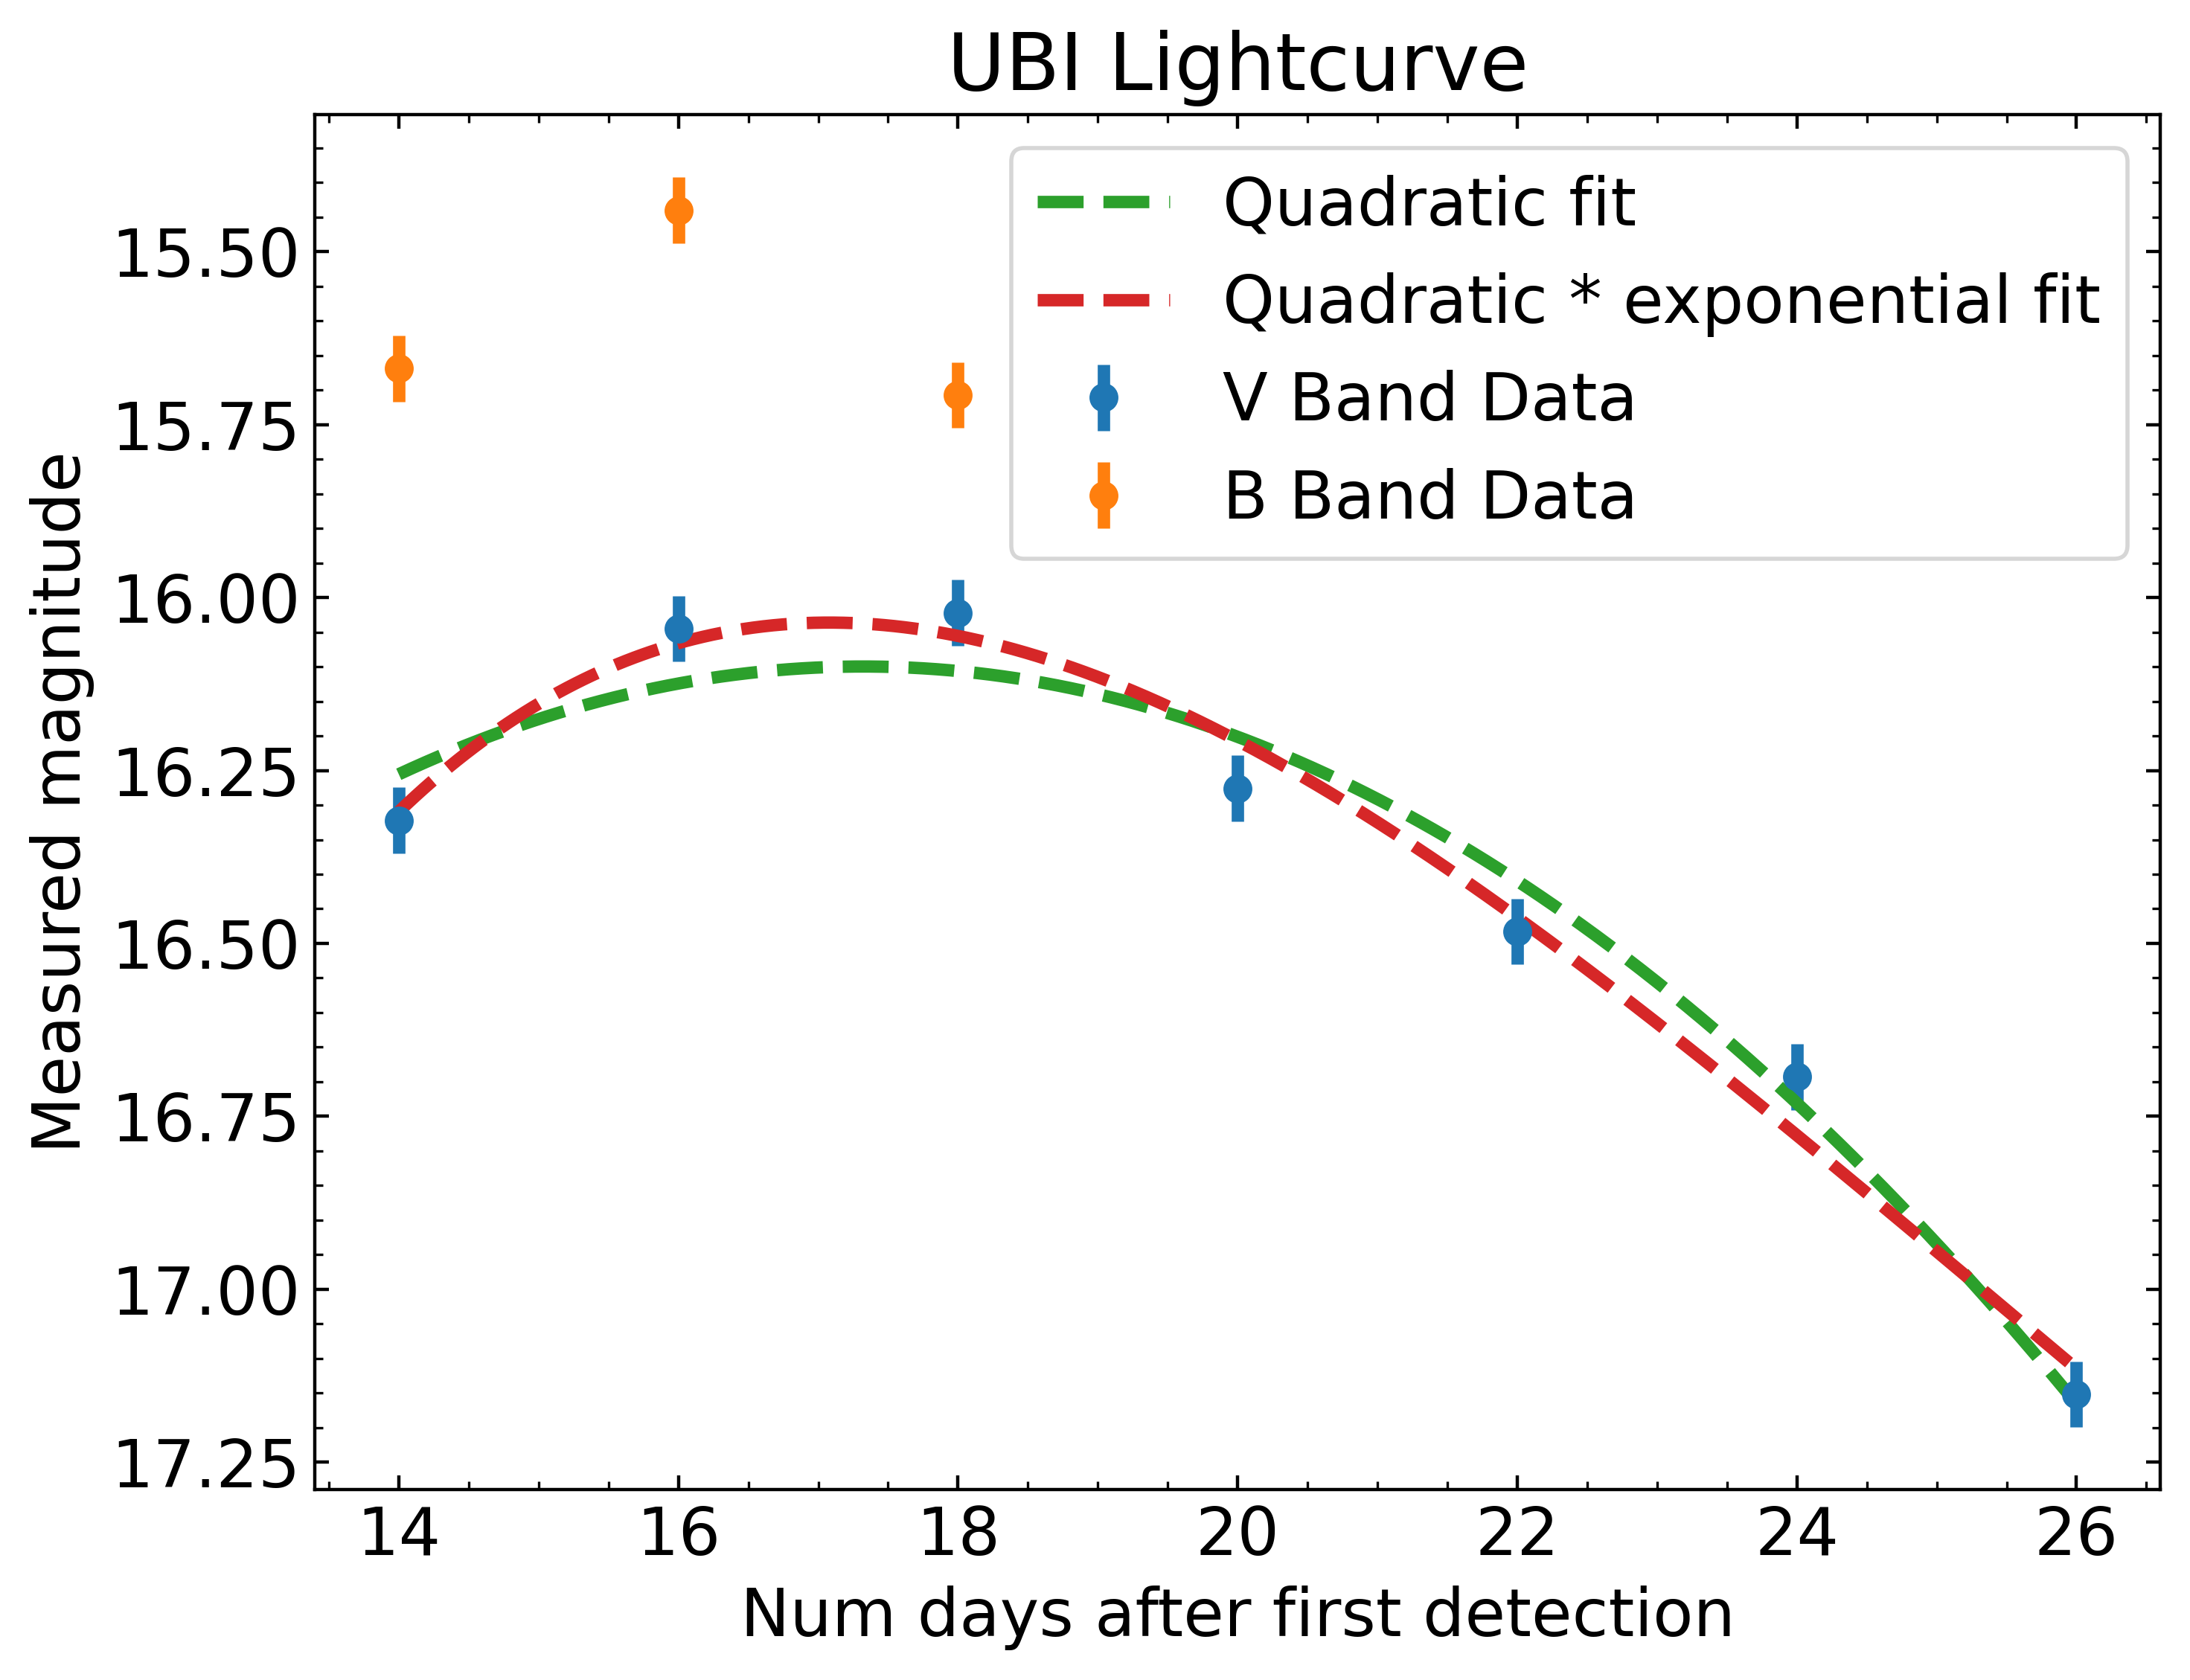

In [24]:
# best fit curves
from scipy.optimize import curve_fit as cf
def quad(x,a,b,c):
    return a*x**2+b*x+c

par, cov = cf(quad,days,vmags,sigma=verr,absolute_sigma='True')
par_unc = np.sqrt(np.diag(cov))

x = np.linspace(days[0],days[-1],1000)
y = quad(x,par[0],par[1],par[2])

r = vmags - quad(days,*par)
chisq = np.sum((r/vmags)**2)
df = len(days)-2
print("chisq =",chisq,"df =",df)

def quad_exp(x,a,b,c,d):
    return (a*x**2+b*x+c)*np.exp(d*x)

par1, cov1 = cf(quad_exp,days,vmags,sigma=verr,absolute_sigma='True')
par_unc1 = np.sqrt(np.diag(cov1))

y2 = quad_exp(x,par1[0],par1[1],par1[2],par1[3])



plt.figure(figsize=(8,6),dpi=400)
plt.errorbar(days, vmags, yerr=verr,linestyle='',marker='o',label="V Band Data")
plt.errorbar(days[0:3],bmags,yerr=berr,linestyle='',marker='o',label="B Band Data")
plt.plot(x,y,label="Quadratic fit",linestyle='--')
plt.plot(x,y2,label="Quadratic * exponential fit",linestyle='--')
plt.legend()
plt.gca().invert_yaxis()
plt.xlabel("Num days after first detection")
plt.ylabel("Measured magnitude")
plt.title("UBI Lightcurve")

In [48]:
vbright = [10**(i/(-2.5)) for i in vmags]
verr_b = vbright/vsnr
bbright = 10**(bmags/(-2.5))
berr_b = bbright/bsnr

Text(0.5, 1.0, 'UBI Lightcurve in Relative Brightness')

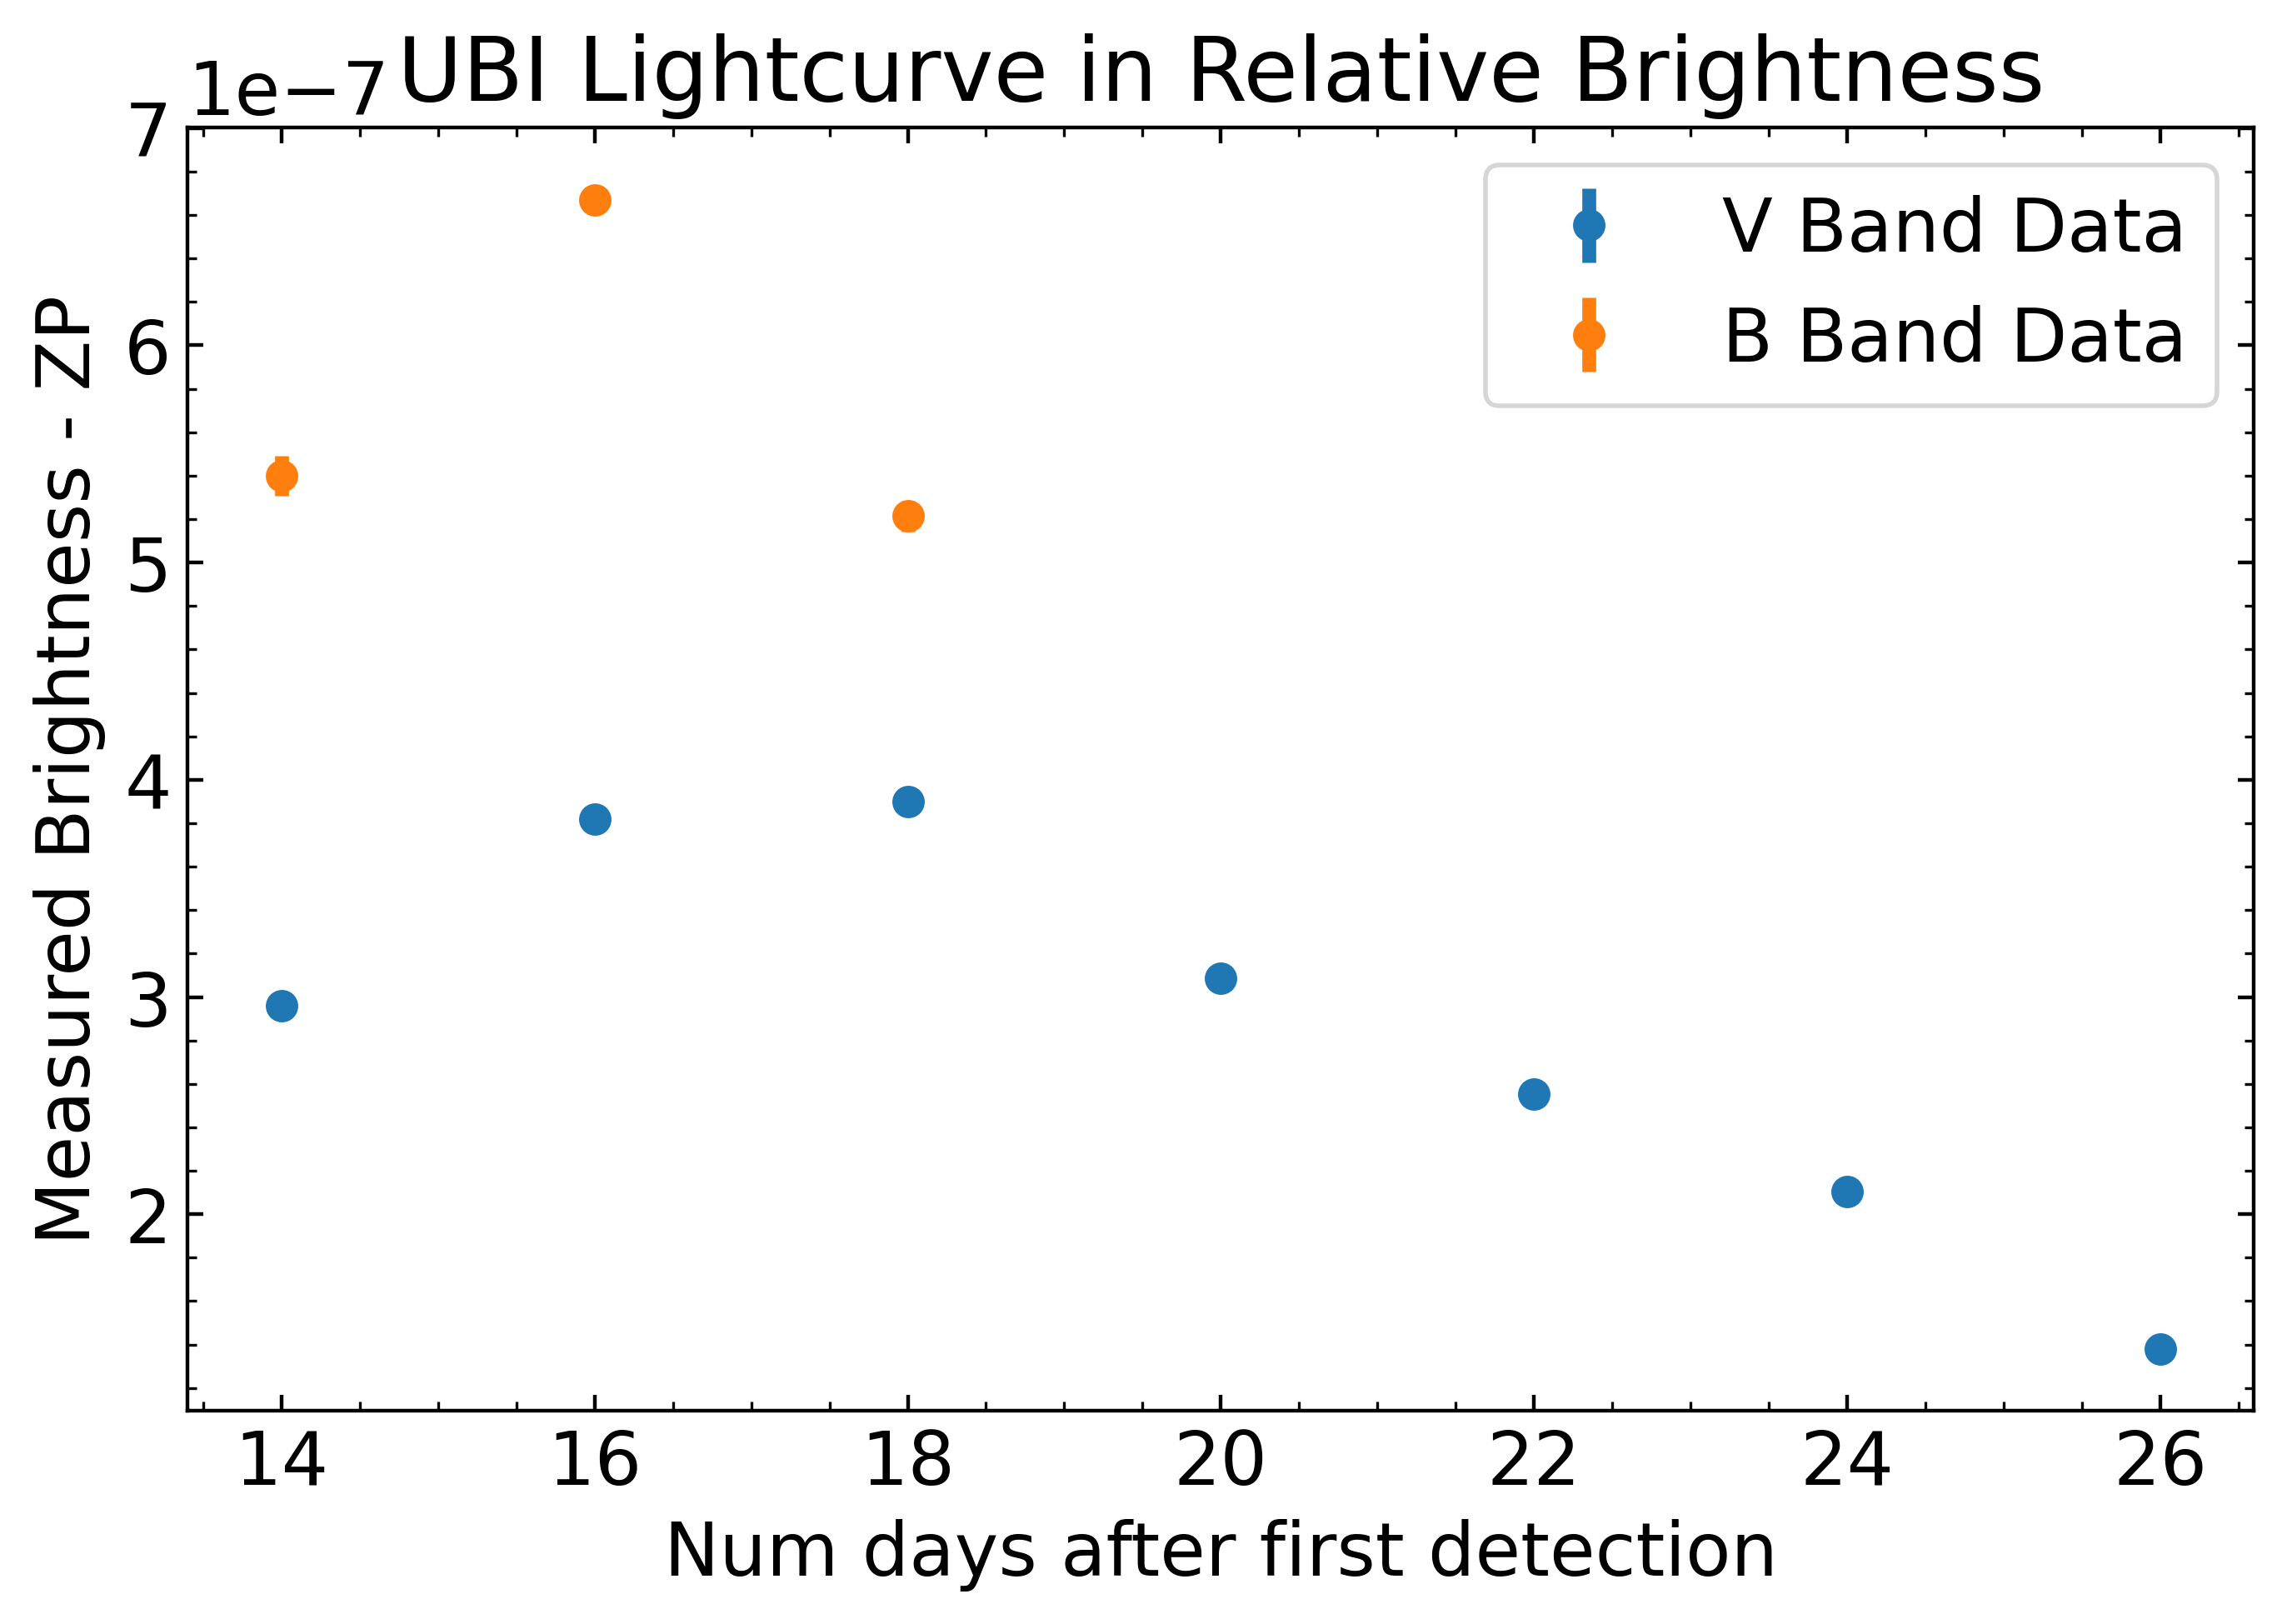

In [53]:
plt.figure(figsize=(8,5),dpi=400)
plt.errorbar(days, vbright, yerr=verr_b,linestyle='',marker='o',label="V Band Data")
plt.errorbar(days[0:3],bbright,yerr=berr_b,linestyle='',marker='o',label="B Band Data")
plt.legend()
plt.xlabel("Num days after first detection")
plt.ylabel("Measured Brightness - ZP")
plt.title("UBI Lightcurve in Relative Brightness")